<a href="https://colab.research.google.com/github/2021BUSTER/deep-learning_minjeong/blob/main/14%EC%9E%A5_BestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 확인 및 실행

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15)

In [ ]:
print(df.head(5)) #처음 다섯줄 출력
print(df.info())

       0     1     2     3      4     5   ...       7     8     9     10  11  12
5316  6.3  0.18  0.24   3.4  0.053  20.0  ...  0.99373  3.11  0.52   9.2   6   0
5210  6.8  0.14  0.18   1.4  0.047  30.0  ...  0.99164  3.27  0.54  11.2   6   0
3518  7.3  0.22  0.50  13.7  0.049  56.0  ...  0.99940  3.24  0.66   9.0   6   0
1622  7.6  0.67  0.14   1.5  0.074  25.0  ...  0.99370  3.05  0.51   9.3   5   0
2443  7.3  0.21  0.29   1.6  0.034  29.0  ...  0.99170  3.30  0.50  11.0   8   0

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8     

In [ ]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=200)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 1.5876 - accuracy: 0.7598
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7120 - accuracy: 0.7444
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.7260
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7689
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7643
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8133
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8474
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8716
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8898
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8908
Epoch 11/200
5/5 [===========

## 모델 업데이트 하기

In [ ]:
import os

In [ ]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', verbose=1, 
                               save_best_only=True)

# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, 
          batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.08045, saving model to ./model/01-0.0805.hdf5

Epoch 00002: val_loss did not improve from 0.08045

Epoch 00003: val_loss improved from 0.08045 to 0.07967, saving model to ./model/03-0.0797.hdf5

Epoch 00004: val_loss did not improve from 0.07967

Epoch 00005: val_loss did not improve from 0.07967

Epoch 00006: val_loss improved from 0.07967 to 0.07792, saving model to ./model/06-0.0779.hdf5

Epoch 00007: val_loss did not improve from 0.07792

Epoch 00008: val_loss improved from 0.07792 to 0.07721, saving model to ./model/08-0.0772.hdf5

Epoch 00009: val_loss did not improve from 0.07721

Epoch 00010: val_loss did not improve from 0.07721

Epoch 00011: val_loss did not improve from 0.07721

Epoch 00012: val_loss improved from 0.07721 to 0.07677, saving model to ./model/12-0.0768.hdf5

Epoch 00013: val_loss did not improve from 0.07677

Epoch 00014: val_loss improved from 0.07677 to 0.07649, saving model to ./model/14-0.0765.hdf5

Epoch 00015

## 그래프로 확인하기

In [ ]:
import matplotlib.pyplot as plt

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0194 - accuracy: 0.9923 - val_loss: 0.0447 - val_accuracy: 0.9876
Epoch 1002/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0182 - accuracy: 0.9923 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 1003/3500
2/2 [==============================] - 0s 68ms/step - loss: 0.0185 - accuracy: 0.9908 - val_loss: 0.0441 - val_accuracy: 0.9876
Epoch 1004/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0444 - val_accuracy: 0.9876
Epoch 1005/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0440 - val_accuracy: 0.9876
Epoch 1006/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0175 - accuracy: 0.9939 - val_loss: 0.0446 - val_accuracy: 0.9876
Epoch 1007/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0178 - accuracy: 0.993

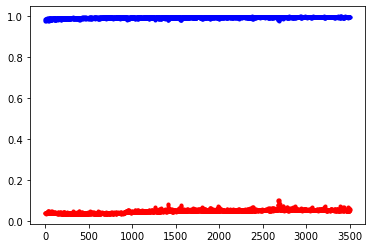

In [ ]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

## 학습의 자동 중단

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, 
          batch_size=500, callbacks=[early_stopping_callback])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.0937 - val_accuracy: 0.9744
Epoch 2/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0076 - accuracy: 0.9962 - val_loss: 0.0878 - val_accuracy: 0.9744
Epoch 3/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0880 - val_accuracy: 0.9795
Epoch 4/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0850 - val_accuracy: 0.9795
Epoch 5/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.0054 - accuracy: 0.9974 - val_loss: 0.0838 - val_accuracy: 0.9795
Epoch 6/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0053 - accuracy: 0.9974 - val_loss: 0.0817 - val_accuracy: 0.9795
Epoch 7/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.0047 - accuracy: 0.9974 - val_loss: 0.0805 - val_accuracy: 0.9795
Epoch 8/2000


## 와인의 종류 예측하기 : 전체코드

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 1.20689, saving model to ./model/01-1.2069.hdf5

Epoch 00002: val_loss improved from 1.20689 to 0.86037, saving model to ./model/02-0.8604.hdf5

Epoch 00003: val_loss improved from 0.86037 to 0.57772, saving model to ./model/03-0.5777.hdf5

Epoch 00004: val_loss did not improve from 0.57772

Epoch 00005: val_loss did not improve from 0.57772

Epoch 00006: val_loss improved from 0.57772 to 0.53607, saving model to ./model/06-0.5361.hdf5

Epoch 00007: val_loss improved from 0.53607 to 0.44392, saving model to ./model/07-0.4439.hdf5

Epoch 00008: val_loss improved from 0.44392 to 0.44263, saving model to ./model/08-0.4426.hdf5

Epoch 00009: val_loss improved from 0.44263 to 0.43578, saving model to ./model/09-0.4358.hdf5

Epoch 00010: val_loss improved from 0.43578 to 0.41058, saving model to ./model/10-0.4106.hdf5

Epoch 00011: val_loss improved from 0.41058 to 0.37877, saving model to ./model/11-0.3788.hdf5

Epoch 00012: val_loss improved from